<a href="https://colab.research.google.com/github/gv1010/ml-coding/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

data = pd.read_excel("sample_dataset.xlsx")

# Checking missing values
print(data.isnull().sum())

ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64


In [28]:
# data["YearBuilt"] = 2024-data["YearBuilt"] # instead of having year, we are referencing with current year

In [29]:
data.drop(columns=["ID",], inplace = True) # removing unwanted column

In [30]:
data.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,5,629,2022,702,1,0,3,627,457528
1,2,2402,1972,251,1,1,3,705,78691
2,7,1547,1968,1224,3,0,1,282,316056
3,1,666,1937,2890,4,1,3,39,213285
4,9,2946,1985,768,2,1,4,848,304717


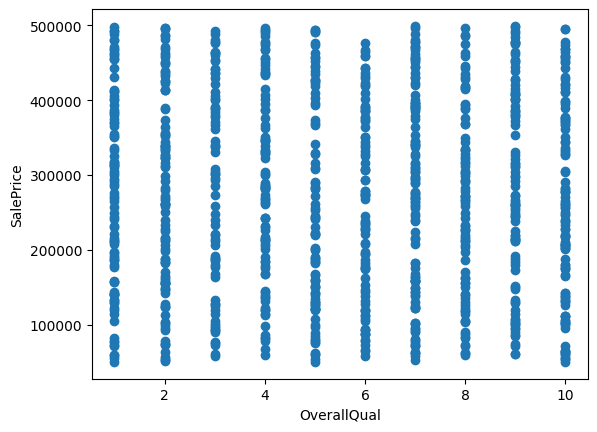

In [31]:
# checking the relation with Sale Price vs OverallQual

import matplotlib.pyplot as plt
plt.scatter(data['OverallQual'], data['SalePrice'])
plt.xlabel('OverallQual')
_ = plt.ylabel('SalePrice')



- from the plot there seems to be no correlation between the OverallQual and SalesPrice

In [32]:
data.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

### Computing the correlation with the target variable and other features in the data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate correlation coefficient
correlation1 = data["SalePrice"].corr(data["OverallQual"], "pearson")
correlation2 = data["SalePrice"].corr(data["GrLivArea"], "pearson")
correlation3 = data["SalePrice"].corr(data["YearBuilt"], "pearson")
correlation4 = data["SalePrice"].corr(data["TotalBsmtSF"], "pearson")
correlation5 = data["SalePrice"].corr(data["FullBath"], "pearson")
correlation6 = data["SalePrice"].corr(data["GarageCars"], "pearson")

# Plot the correlation
# plt.figure(figsize=(8, 6))
# plt.scatter(data["OverallQual"], data["SalePrice"])
# plt.xlabel("Overall Quality")
# plt.ylabel("Sale Price")
# plt.title(f"Correlation between Overall Quality and Sale Price: {correlation:.2f}")
# plt.grid(True)
# plt.show()

print(f"The correlation coefficient between Overall Quality and Sale Price is: {correlation1:.2f}")

print(f"The correlation coefficient between GrLivArea and Sale Price is: {correlation2:.2f}")

print(f"The correlation coefficient between YearBuilt and Sale Price is: {correlation3:.2f}")

print(f"The correlation coefficient between TotalBsmtSF and Sale Price is: {correlation4:.2f}")

print(f"The correlation coefficient between FullBath and Sale Price is: {correlation5:.2f}")

print(f"The correlation coefficient between GarageCars and Sale Price is: {correlation6:.2f}")

The correlation coefficient between Overall Quality and Sale Price is: -0.02
The correlation coefficient between GrLivArea and Sale Price is: -0.02
The correlation coefficient between YearBuilt and Sale Price is: -0.00
The correlation coefficient between TotalBsmtSF and Sale Price is: 0.03
The correlation coefficient between FullBath and Sale Price is: 0.01
The correlation coefficient between GarageCars and Sale Price is: 0.02


- weak correlation with features and target variable

- TotalBsmtSF feature showing marginally better correlation (0.03) with the targte variable

In [36]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


X = data.drop("SalePrice", axis=1)  # Features
X.columns = X.columns.astype(str)
y = data["SalePrice"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled.shape, X_test_scaled.shape

((700, 8), (300, 8))

In [40]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression

import numpy as np

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")



Mean Squared Error: 17365060886.823326
Root Mean Squared Error: 131776.55666628768
R-squared: -0.02439536901004069


- Interpretation of predictions - Model predicts a house price based on the linear relationship between features and historical data. Higher R-squared indicates a better fit.
- Here the r-squared value is close to 0, which indicates the fit is very poor.



- Improvements - using more complex models like Random Forests especially to capture non-linear relationships between features and target variables.

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 18753893359.32196
Root Mean Squared Error: 136944.85517653433
R-squared: -0.10632503009392003


- Random forest perform poorly in comparision with linear model

# Conclusions:
- Both models perform poorly from the given data, this can be due the weak realtionship between features and target variables
- the Linear model with (r squared = -0.024) is better than Random forest regressor (r-squared = -0.105) but neither of these model makes a goot fit on the data.
- neagtive r-squred indicates the model was not able to fit in comparision with the mean-line.
- Improvements: adding more relevant features and more data points, may yeild in better fit on the data.